In [1]:
# imports

import pandas as pd
import numpy as np
from scipy.stats import trim_mean   # conda install scipy
from statsmodels import robust      # conda install -c conda-forge statsmodels 
import wquantiles                   # pip install wquantiles

import seaborn as sns
import matplotlib.pylab as plt

# DESCRIPTIVE STATISTICS:

In [3]:
# Create df with all data from csv:

diamonds = pd.read_csv('../data/diamonds_train.csv')
diamonds.head()

,price,carat,city,depth,table,x,y,z,cut,color,clarity
0,4268,1.21,Dubai,62.4,58.0,6.83,6.79,4.25,Premium,J,VS2
1,505,0.32,Kimberly,63.0,57.0,4.35,4.38,2.75,Very Good,H,VS2
2,2686,0.71,Las Vegas,65.5,55.0,5.62,5.53,3.65,Fair,G,VS1
3,738,0.41,Kimberly,63.8,56.0,4.68,4.72,3.00,Good,D,SI1
4,4882,1.02,Dubai,60.5,59.0,6.55,6.51,3.95,Ideal,G,SI1


In [21]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           40455 non-null  int64  
 1   carat           40455 non-null  float64
 2   city            40455 non-null  object 
 3   depth           40455 non-null  float64
 4   table           40455 non-null  float64
 5   x               40455 non-null  float64
 6   y               40455 non-null  float64
 7   z               40455 non-null  float64
 8   cut             40455 non-null  object 
 9   color           40455 non-null  object 
 10  clarity         40455 non-null  object 
 11  dev_price       40455 non-null  float64
 12  mean_dev_price  40455 non-null  float64
 13  var_price       40455 non-null  float64
dtypes: float64(9), int64(1), object(4)
memory usage: 4.3+ MB


In [5]:
# Categorical variables:

def cat_var(df, cols):
    '''
    Return: a Pandas dataframe object with the following columns:
        - "categorical_variable" => every categorical variable include as an input parameter (string).
        - "number_of_possible_values" => the amount of unique values that can take a given categorical variable (integer).
        - "values" => a list with the posible unique values for every categorical variable (list).

    Input parameters:
        - df -> Pandas dataframe object: a dataframe with categorical variables.
        - cols -> list object: a list with the name (string) of every categorical variable to analyse.
    '''
    cat_list = []
    for col in cols:
        cat = df[col].unique()
        cat_num = len(cat)
        cat_dict = {"categorical_variable":col,
                    "number_of_possible_values":cat_num,
                    "values":cat}
        cat_list.append(cat_dict)
    df = pd.DataFrame(cat_list).sort_values(by="number_of_possible_values", ascending=False)
    return df.reset_index(drop=True)

In [33]:
cat_var_lst = ["city", "cut", "color", "clarity"]
df_cat_var = cat_var(diamonds, cat_var_lst)
df_cat_var

,categorical_variable,number_of_possible_values,values
0,city,13,"[Dubai, Kimberly, Las Vegas, Tel Aviv, Amsterd..."
1,clarity,8,"[VS2, VS1, SI1, SI2, IF, VVS1, VVS2, I1]"
2,color,7,"[J, H, G, D, F, E, I]"
3,cut,5,"[Premium, Very Good, Fair, Good, Ideal]"


In [69]:
# Numerical variables:

# Price CENTRAL TENDENCY

mean = diamonds['price'].mean()
print(f'Price Mean is: {mean}')

tmean = trim_mean(diamonds['price'], 0.1)
print(f'Price Trimmed Mean is: {tmean}')

median = diamonds['price'].median()
print(f'Price Median is: {median}')

# Price VARIABILITY

diamonds['dev_price'] = diamonds['price'].mean() - diamonds['price']
tot_deviation = diamonds['dev_price'].sum()
print(f'Price Total Deviation is: {tot_deviation}')

diamonds['mean_dev_price'] = abs(diamonds['price'].mean() - diamonds['price'])
mean_abs_dev = diamonds['mean_dev_price'].sum()/len(diamonds['mean_dev_price'])
print(f'Price Mean Absolute Deviation is: {mean_abs_dev}')

diamonds['var_price'] = (diamonds['price'].mean() - diamonds['price'])**2
variance = diamonds['var_price'].sum()/(len(diamonds['mean_dev_price'])-1)
print(f'Price Variance is: {variance}')

std_dev = diamonds['price'].std()
print(f'Price Standard Deviation is: {std_dev}')

# It seems like there is meaningful variability in price, let's order the dataset

Price Mean is: 3928.444469163268
Price Trimmed Mean is: 3153.22252433184
Price Median is: 2397.0
Price Total Deviation is: -7.043126970529556e-09
Price Mean Absolute Deviation is: 3034.0658933710733
Price Variance is: 15939386.687768824
Price Standard Deviation is: 3992.4161466170613


In [27]:
order_data = diamonds.sort_values(by="price").reset_index(drop=True)

In [28]:
order_data.head()

,price,carat,city,depth,table,x,y,z,cut,color,clarity,dev_price,mean_dev_price,var_price
0,326,0.21,Tel Aviv,59.8,61.0,3.89,3.84,2.31,Premium,E,SI1,3602.444469,3602.444469,1.297761e+07
1,326,0.23,Paris,61.5,55.0,3.95,3.98,2.43,Ideal,E,SI2,3602.444469,3602.444469,1.297761e+07
2,327,0.23,Zurich,56.9,65.0,4.05,4.07,2.31,Good,E,VS1,3601.444469,3601.444469,1.297040e+07
3,334,0.29,Kimberly,62.4,58.0,4.20,4.23,2.63,Premium,I,VS2,3594.444469,3594.444469,1.292003e+07
4,335,0.31,Tel Aviv,63.3,58.0,4.34,4.35,2.75,Good,J,SI2,3593.444469,3593.444469,1.291284e+07


In [29]:
order_data.tail()

,price,carat,city,depth,table,x,y,z,cut,color,clarity,dev_price,mean_dev_price,var_price
40450,18795,2.00,Kimberly,60.8,59.0,8.13,8.02,4.91,Premium,I,VS1,-14866.555531,14866.555531,2.210145e+08
40451,18797,2.29,Surat,61.8,59.0,8.52,8.45,5.24,Premium,I,SI1,-14868.555531,14868.555531,2.210739e+08
40452,18806,1.51,New York City,61.7,55.0,7.37,7.41,4.56,Ideal,G,IF,-14877.555531,14877.555531,2.213417e+08
40453,18818,2.00,Madrid,63.5,56.0,7.90,7.97,5.04,Very Good,G,SI1,-14889.555531,14889.555531,2.216989e+08
40454,18823,2.29,Kimberly,60.8,60.0,8.50,8.47,5.16,Premium,I,VS2,-14894.555531,14894.555531,2.218478e+08


In [31]:
# MORE VARIABILITY indicators:

rng = diamonds['price'].max() - diamonds['price'].min()
print(f'Price Range is: {rng}')

per_25 = diamonds['price'].quantile(0.25)
per_75 = diamonds['price'].quantile(0.75)
iqr = per_75 - per_25
print(f'Price Interquartile Range is: {iqr}')

# INSIGHT: Given the Range and other variability indicators, we can conclude that Price distribution is scattered

Price Range is: 18497
Price Interquartile Range is: 4386.0


In [65]:
# Now that we know central tendency and variability of price, let's see the correlation to other variables:

num_var_lst = ([i for i in list(diamonds.columns) if i not in cat_var_lst])
num_var_lst.remove('dev_price')
num_var_lst.remove('mean_dev_price')
num_var_lst.remove('var_price')
print(num_var_lst)

df_num_var = diamonds[num_var_lst]
#df_num_var.head()

df_num_var.corr()

['price', 'carat', 'depth', 'table', 'x', 'y', 'z']


,price,carat,depth,table,x,y,z
price,1.000000,0.921935,-0.014864,0.130111,0.885848,0.866163,0.874500
carat,0.921935,1.000000,0.026528,0.183392,0.975688,0.951667,0.967570
depth,-0.014864,0.026528,1.000000,-0.293114,-0.026348,-0.030966,0.094655
table,0.130111,0.183392,-0.293114,1.000000,0.196059,0.184673,0.155189
x,0.885848,0.975688,-0.026348,0.196059,1.000000,0.973712,0.984876
y,0.866163,0.951667,-0.030966,0.184673,0.973712,1.000000,0.964828
z,0.874500,0.967570,0.094655,0.155189,0.984876,0.964828,1.000000


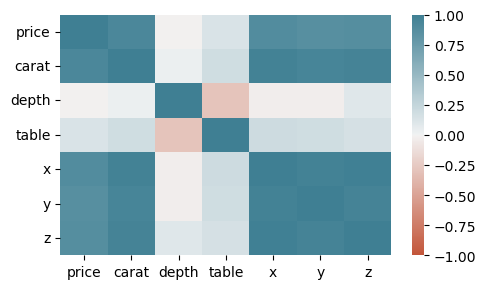

In [68]:
# Correlation matrix heatmap

fig, ax = plt.subplots(figsize=(5, 3))
ax = sns.heatmap(df_num_var.corr(),
                 vmin=-1,
                 vmax=1,
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)
plt.tight_layout()

In [ ]:
# INSIGHT: Price is highly dependant on carat, and dimensions (x, y ,z). While depth and table have negative relationship

In [83]:
# Let's get now Central tendency and variability of the rest of numerical variables:

for col in num_var_lst:
    print(f'{col} indicators:')
    mean = diamonds[col].mean()
    median = diamonds[col].median()
    std = diamonds[col].std()
    rng = diamonds[col].max() - diamonds[col].min()
    print(f'{col} Mean is: {mean}')
    print(f'{col} Median is: {median}')
    print(f'{col} Standard Deviation is: {std}')
    print(f'{col} Range is: {rng}\n')
    
# INSIGHT: depth and table have relatively small variability. This might explain low correlation to Price

price indicators:
price Mean is: 3928.444469163268
price Median is: 2397.0
price Standard Deviation is: 3992.4161466170613
price Range is: 18497

carat indicators:
carat Mean is: 0.7977055988134963
carat Median is: 0.7
carat Standard Deviation is: 0.47554421532468527
carat Range is: 4.3

depth indicators:
depth Mean is: 61.752841428748
depth Median is: 61.8
depth Standard Deviation is: 1.4317253979077107
depth Range is: 36.0

table indicators:
table Mean is: 57.446132740081566
table Median is: 57.0
table Standard Deviation is: 2.2335352685810945
table Range is: 52.0

x indicators:
x Mean is: 5.729391669756519
x Median is: 5.69
x Standard Deviation is: 1.124452692618594
x Range is: 10.23

y indicators:
y Mean is: 5.732818687430478
y Median is: 5.71
y Standard Deviation is: 1.146649896091256
y Range is: 58.9

z indicators:
z Mean is: 3.5371536274873314
z Median is: 3.52
z Standard Deviation is: 0.6970615911262161
z Range is: 8.06



In [85]:
# Categorical variables statistics

for col in cat_var_lst:
    print(f'{col} indicators:')
    mode = diamonds[col].mode()[0]
    print(f'{col} Mode is: {mode}\n')
    
# Missing percentages

city indicators:
city Mode is: Surat

cut indicators:
cut Mode is: Ideal

color indicators:
color Mode is: G

clarity indicators:
clarity Mode is: SI1



# VISUALIZATION:

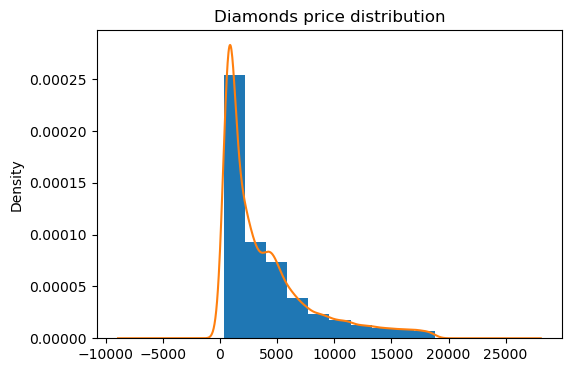

In [95]:
# Histogram - Price

data = diamonds['price']
ax = data.plot.hist(density=True, figsize=(6, 4))
data.plot.density(ax=ax)
ax.set_title('Diamonds price distribution')
plt.show()

# This plot tells that most of the diamonds have price below 5.000$

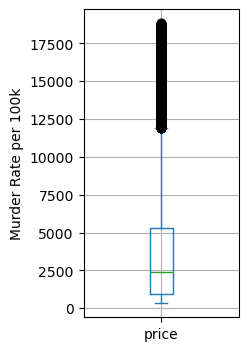

In [97]:
# Boxplot - Price

ax = data.plot.box(figsize=(2, 4))
ax.set_ylabel('Murder Rate per 100k')
plt.grid()
plt.show()

# This plot tells confirms high variability and also shows many outliers

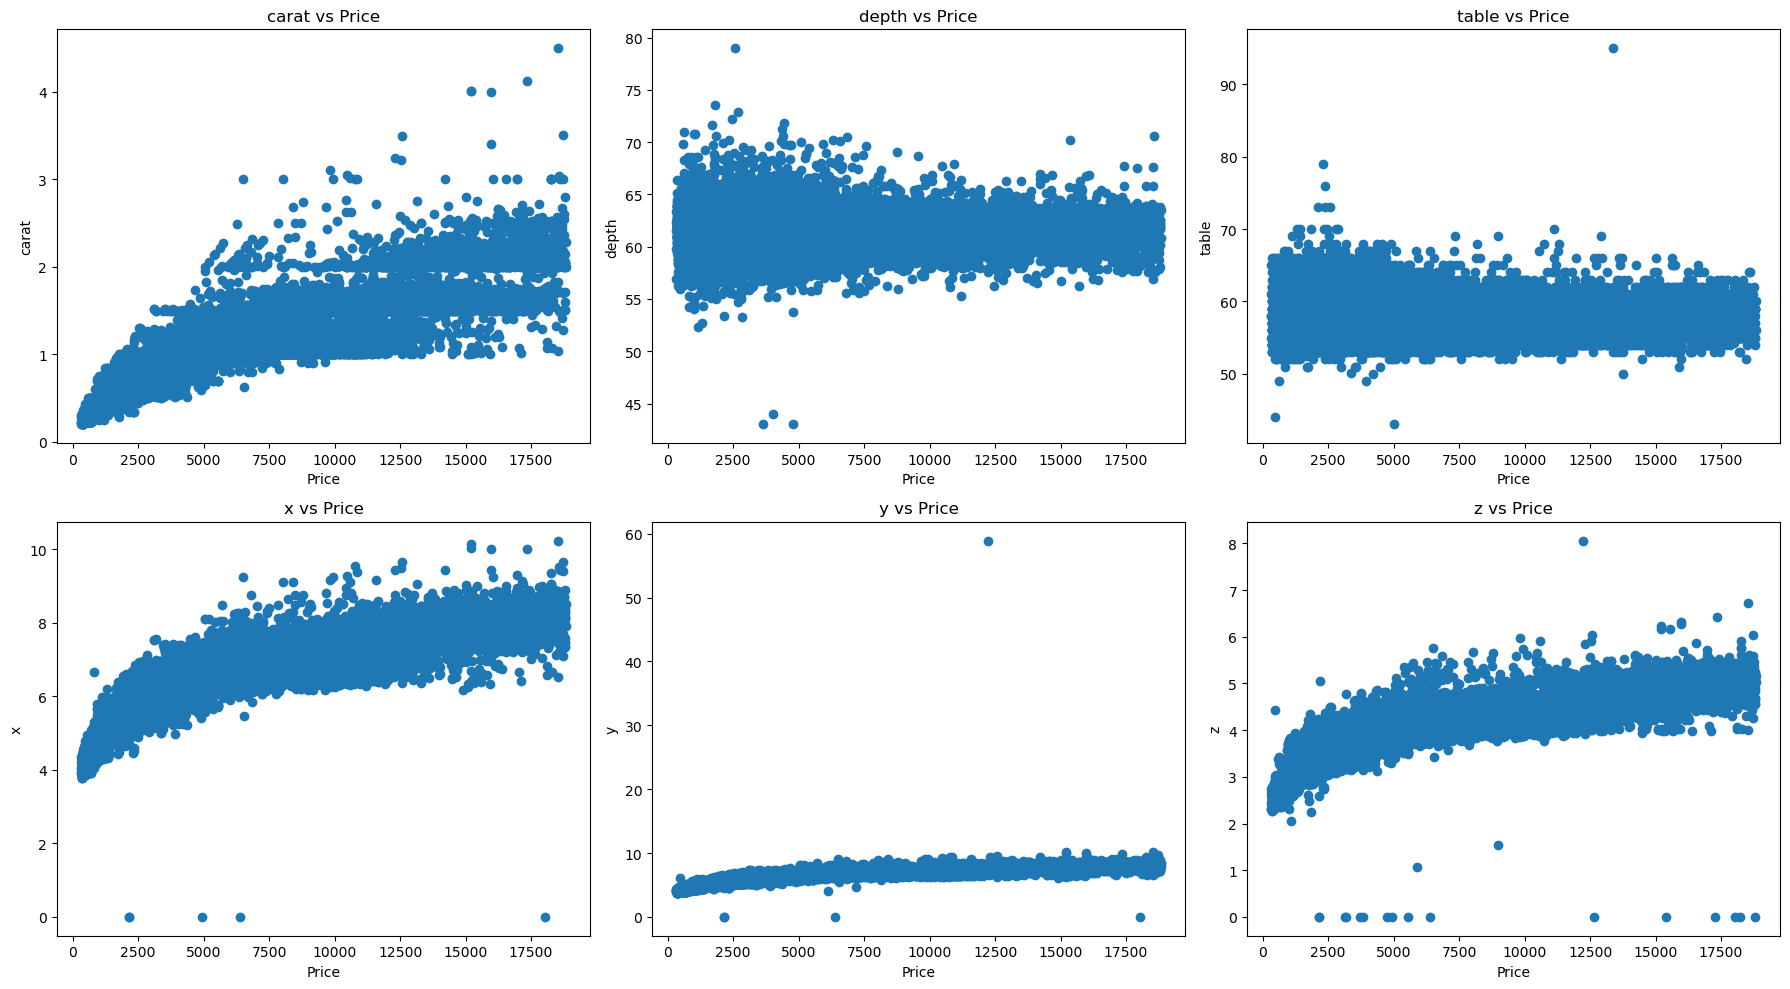

In [115]:
# Scatter plot: Relationship between price and other numerical variables

# Create a 2x3 grid of subplots (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))  # Increase figsize for better spacing

# Flatten axes array for easier indexing
axes = axes.flatten()

# Loop through the features and plot on the corresponding subplot
for i, feature in enumerate(num_var_lst[1:]):  # Adjust the range to match your desired features
    ax = axes[i]  # Access the subplot
    ax.scatter(diamonds['price'], diamonds[feature])  # Scatter plot on the current axis
    ax.set_xlabel('Price')
    ax.set_ylabel(feature)
    ax.set_title(f'{feature} vs Price')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Similar conclusion to what we saw with correlation heatmap

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

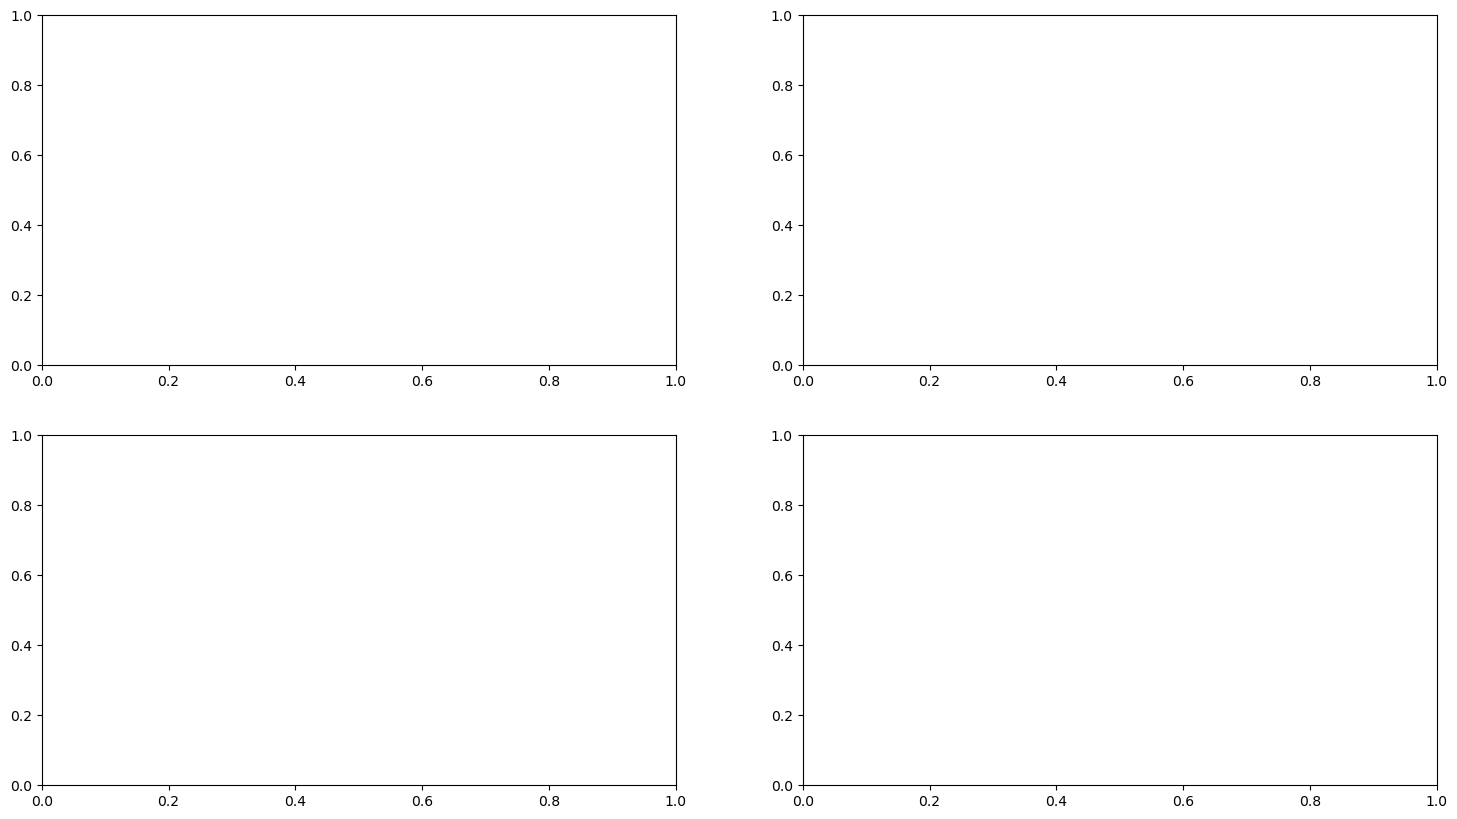

In [117]:
# Boxplot: Relationship between price and categorical variables

# Create a 2x3 grid of subplots (2 rows, 2 columns)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))  # Increase figsize for better spacing

# Flatten axes array for easier indexing
axes = axes.flatten()

# Loop through the features and plot on the corresponding subplot
for i, feature in enumerate(cat_var_lst):  # Adjust the range to match your desired features
    ax = axes[i]  # Access the subplot
    ax.boxplot(diamonds['price'], diamonds[feature])  # box plot on the current axis
    ax.set_xlabel('Price')
    ax.set_ylabel(feature)
    ax.set_title(f'{feature} vs Price')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()